# Exploratory Data Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<div class="dataset-info">
    <h2>Dataset Information</h2>
    <p>Additional Information</p>
    <p>This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).</p>
    <h3>Notes:</h3>
    <ol>
        <li>(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2, and 3.</li>
        <li>The dataset contains some missing values in the measurements (nearly 1.25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.</li>
    </ol>
</div>


<div class="energy-data">
    <p><strong>Date:</strong> dd/mm/yyyy</p>
    <p><strong>Time:</strong> hh:mm:ss</p>
    <p><strong>Global Active Power:</strong> household global minute-averaged active power (in kilowatt)</p>
    <p><strong>Global Reactive Power:</strong> household global minute-averaged reactive power (in kilowatt)</p>
    <p><strong>Voltage:</strong> minute-averaged voltage (in volt)</p>
    <p><strong>Global Intensity:</strong> household global minute-averaged current intensity (in ampere)</p>
    <p><strong>Sub-metering 1:</strong> energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).</p>
    <p><strong>Sub-metering 2:</strong> energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.</p>
    <p><strong>Sub-metering 3:</strong> energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.</p>
</div>


In [2]:
path = '/home/tomruge/Schreibtisch/Data/FH/household_power_consumption.txt'
data = pd.read_csv(path, sep=';', engine='pyarrow')

data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Datetime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str))
data = data.set_index('Datetime')
data = data.drop(['Date', 'Time'], axis=1)
# drop rows with missing values
data = data.dropna()
# make all data float
data = data.astype('float')

data['Active_Energy_Consumption without submeters'] = data['Global_active_power'] * 1000 / 60 - data['Sub_metering_1'] - data['Sub_metering_2'] - data['Sub_metering_3']


In [20]:
display(data.isnull().sum())
display(data.shape)
display(data.columns)
display(data.head())
display(data.info())   
display(data.describe())

Global_active_power                            0
Global_reactive_power                          0
Voltage                                        0
Global_intensity                               0
Sub_metering_1                                 0
Sub_metering_2                                 0
Sub_metering_3                                 0
Active_Energy_Consumption without submeters    0
dtype: int64

(2049280, 8)

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Active_Energy_Consumption without submeters'],
      dtype='object')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Active_Energy_Consumption without submeters
Datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049280 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 8 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Global_active_power                          float64
 1   Global_reactive_power                        float64
 2   Voltage                                      float64
 3   Global_intensity                             float64
 4   Sub_metering_1                               float64
 5   Sub_metering_2                               float64
 6   Sub_metering_3                               float64
 7   Active_Energy_Consumption without submeters  float64
dtypes: float64(8)
memory usage: 140.7 MB


None

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Active_Energy_Consumption without submeters
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,9.314693e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,9.585916e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.800000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.500000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.036667e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02


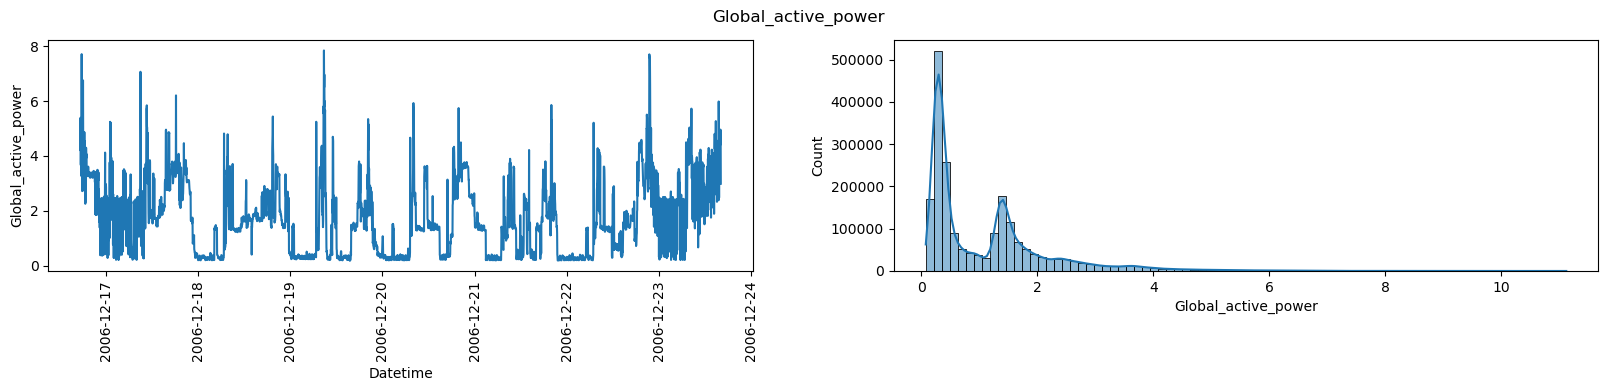

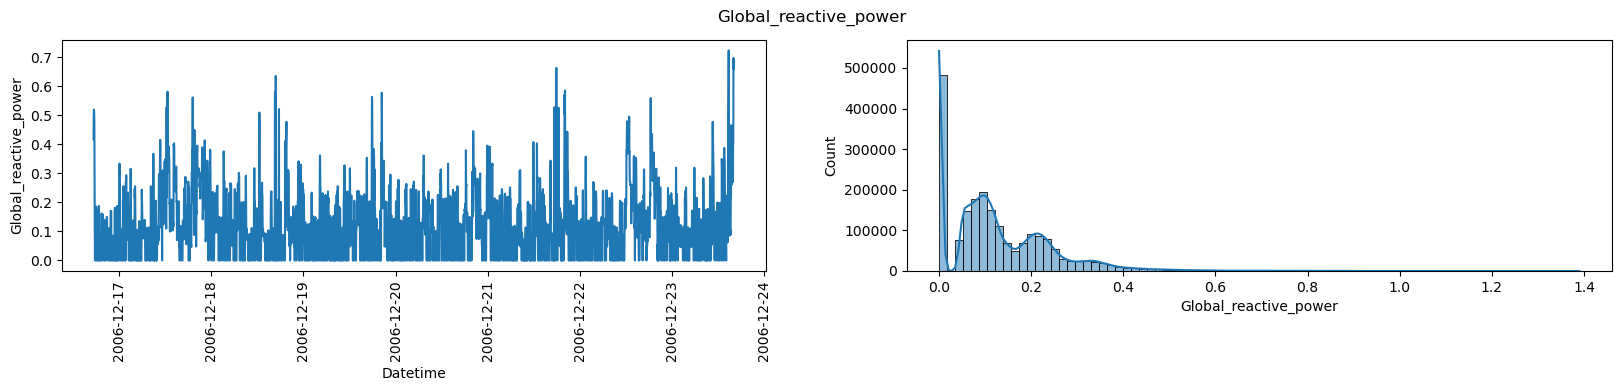

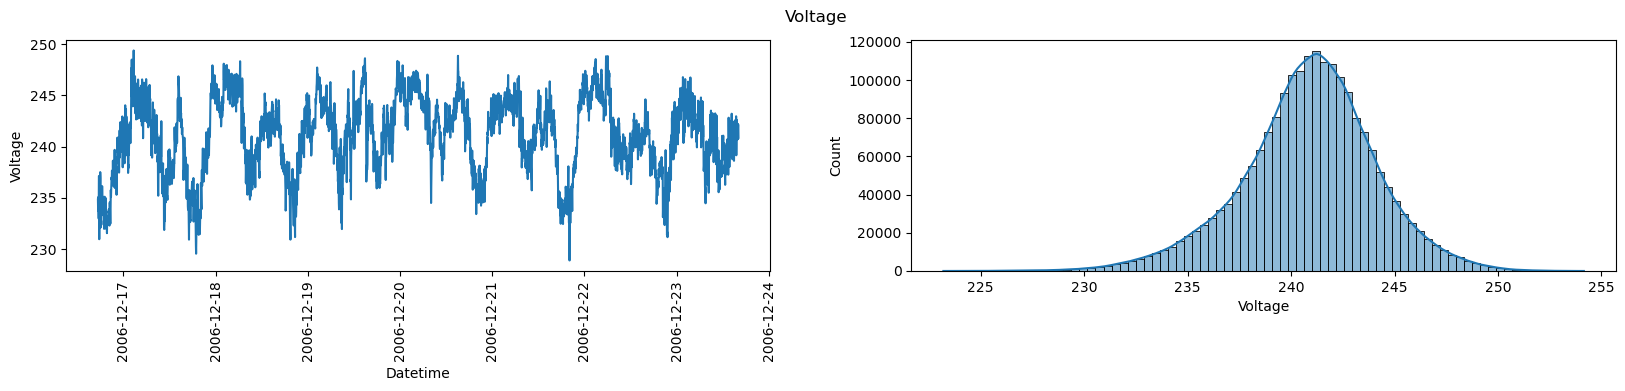

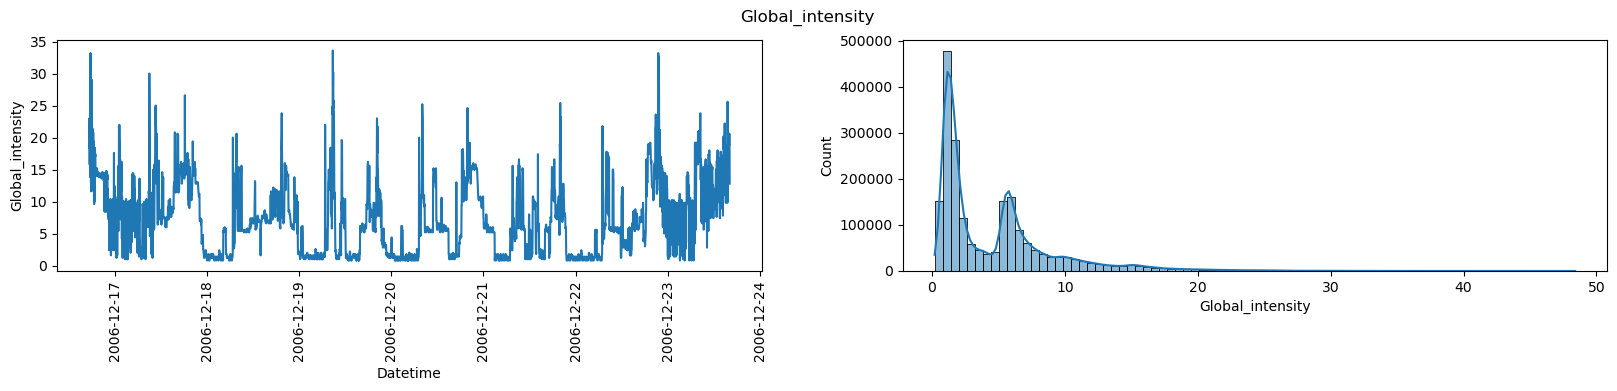

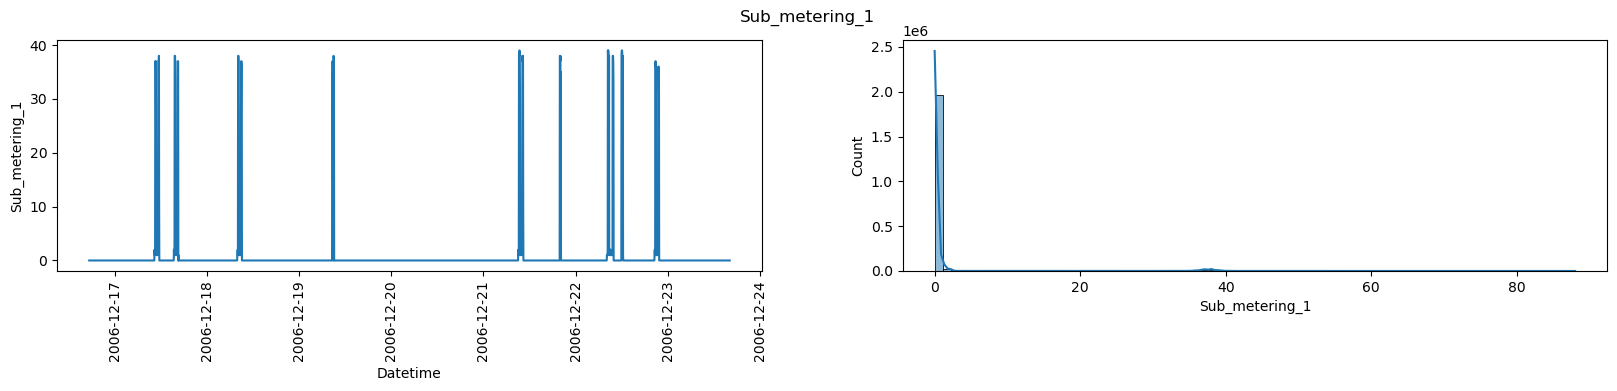

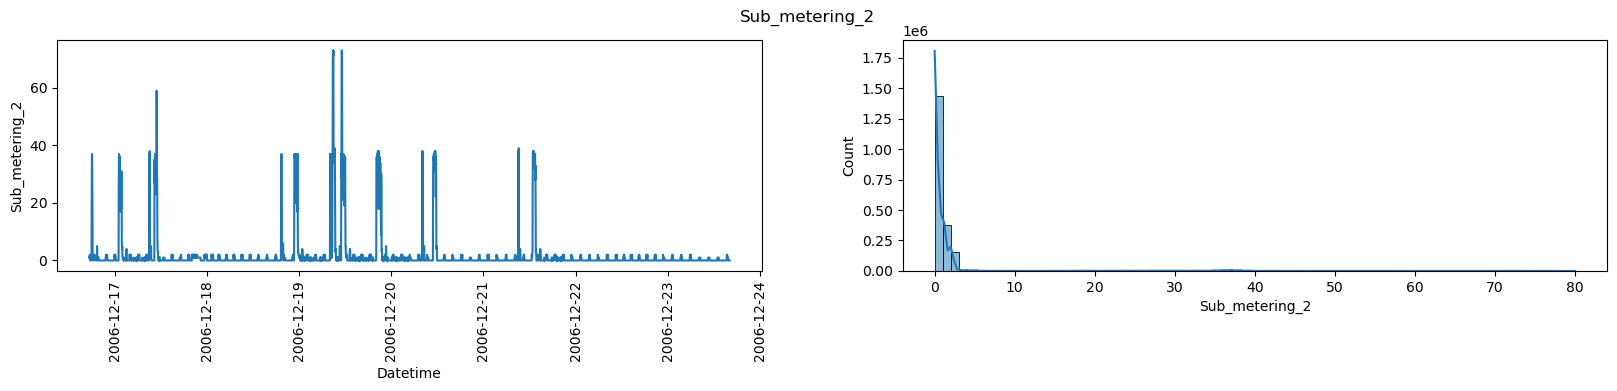

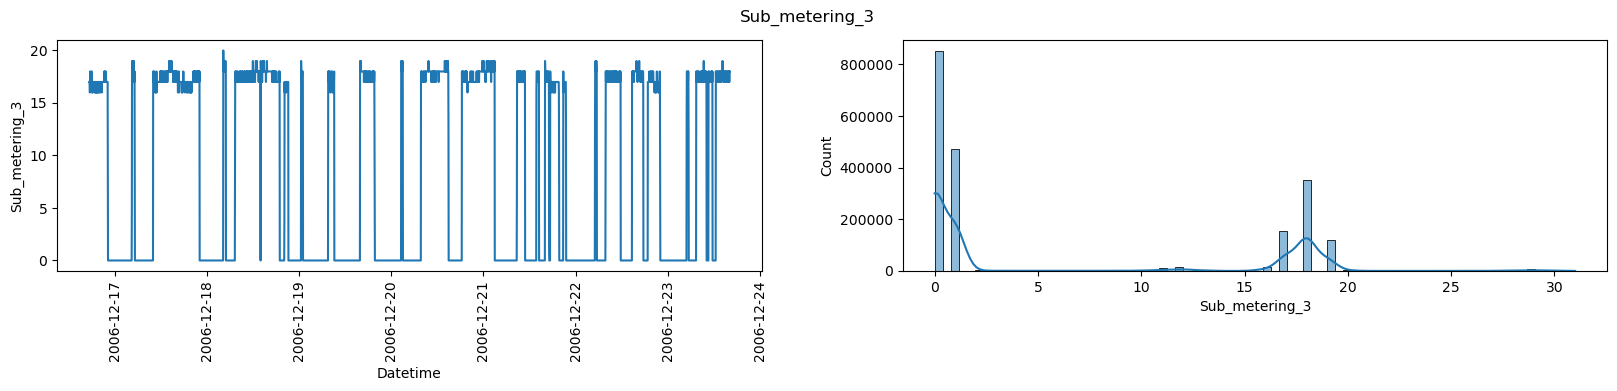

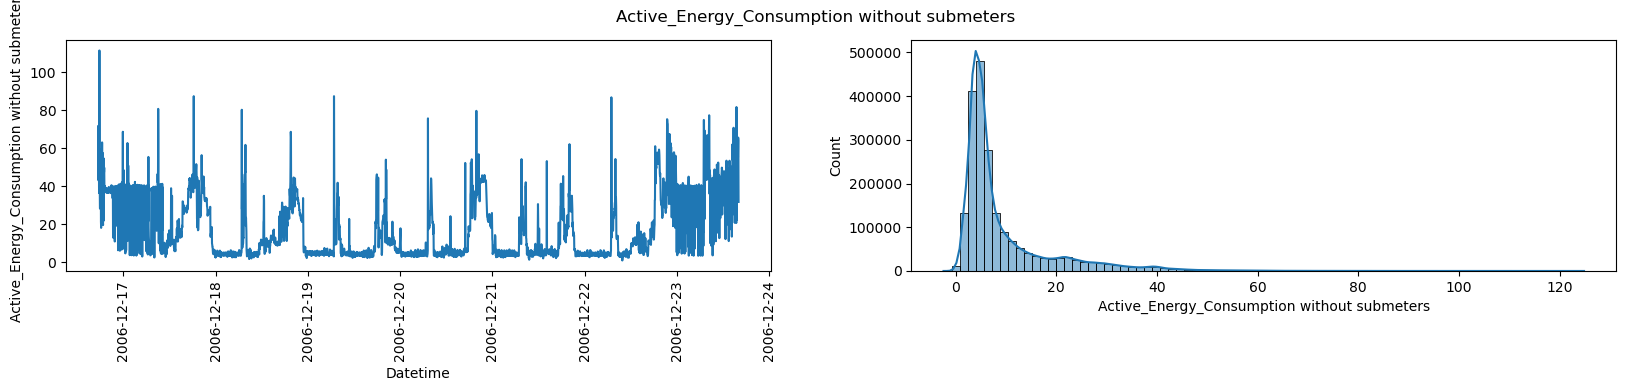

In [25]:
# plot timeseries with seaborn
import datetime
# extrcat first year of data to plot
for column in data.columns:
    fig, ax = plt.subplots(1,2,figsize=(20, 3))
    sns.lineplot(data=data.iloc[:10000:3,:][column], ax = ax[0])
    # rotate xlabel 
    ax[0].tick_params(axis='x', rotation=90)
    sns.histplot(data=data,x = column, ax = ax[1], kde = True, bins = 80)
    plt.suptitle(column)
    plt.show()

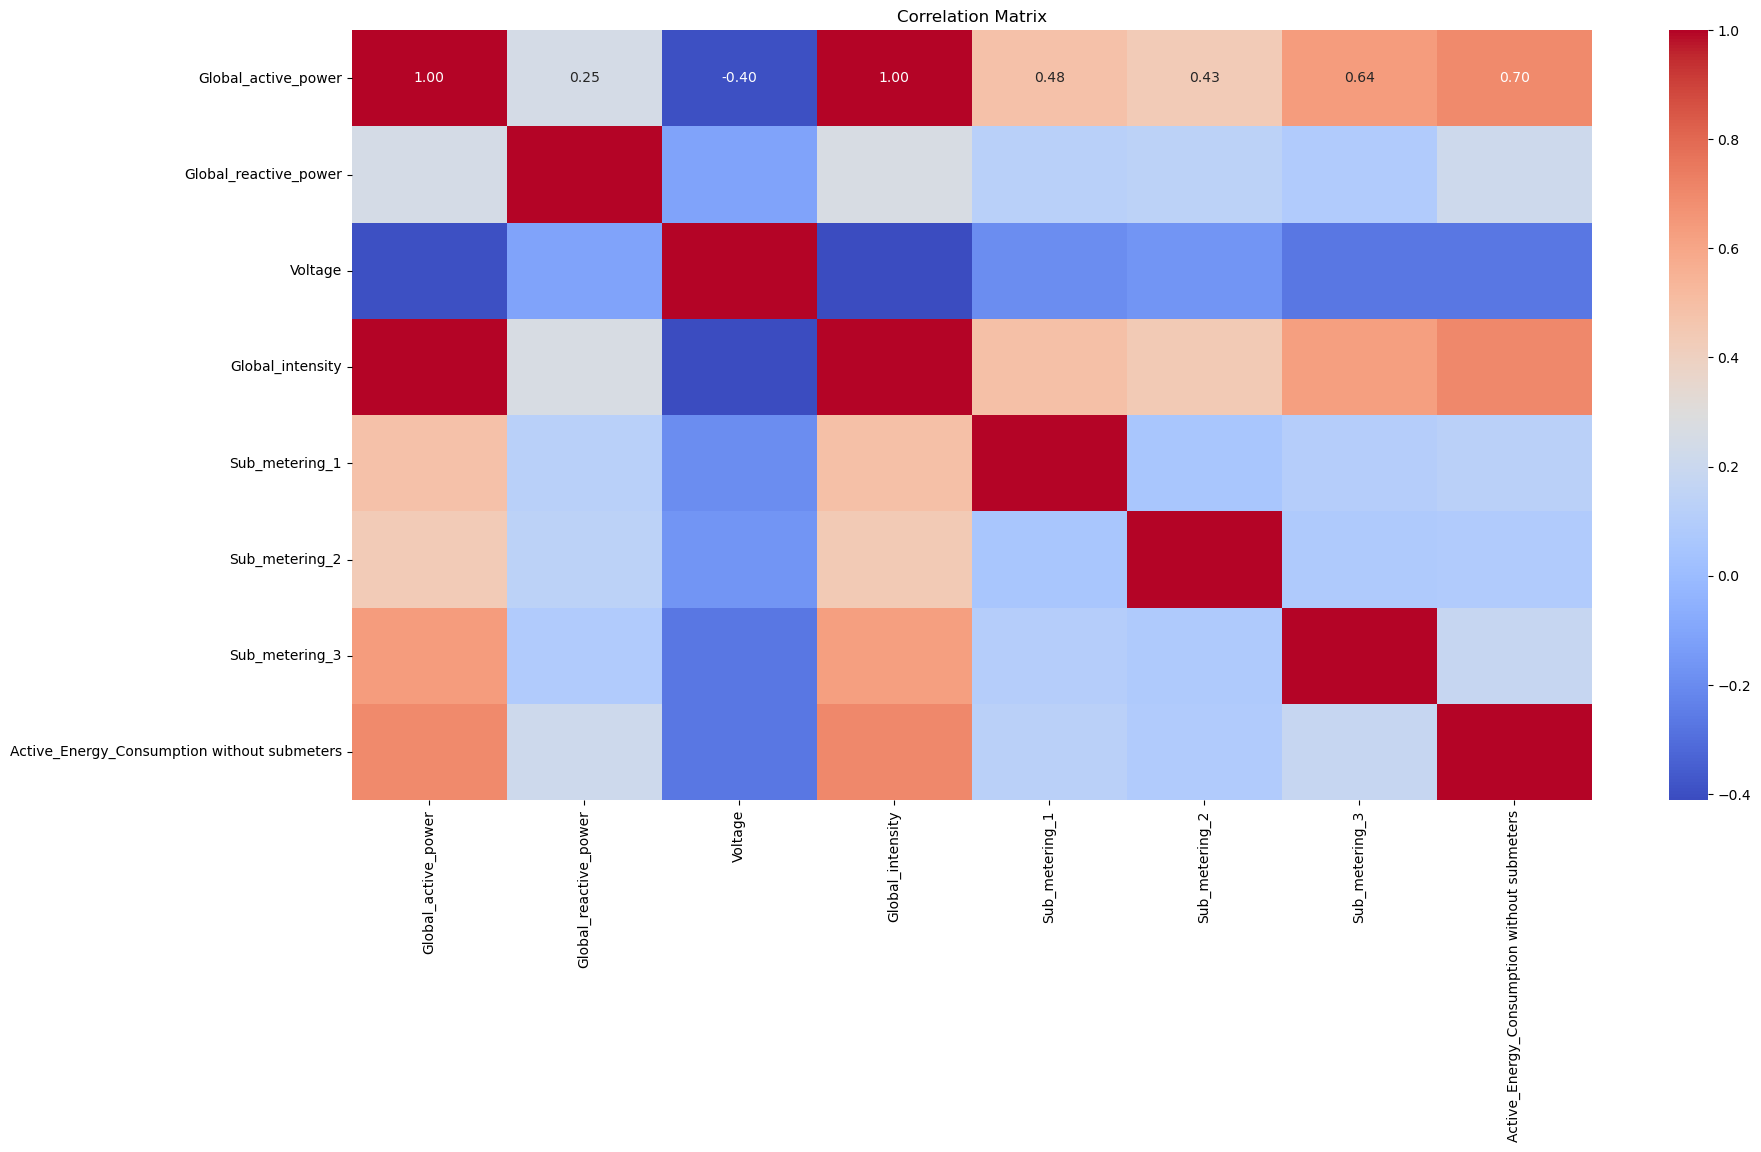

In [26]:
# correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Figure size 800x550 with 0 Axes>

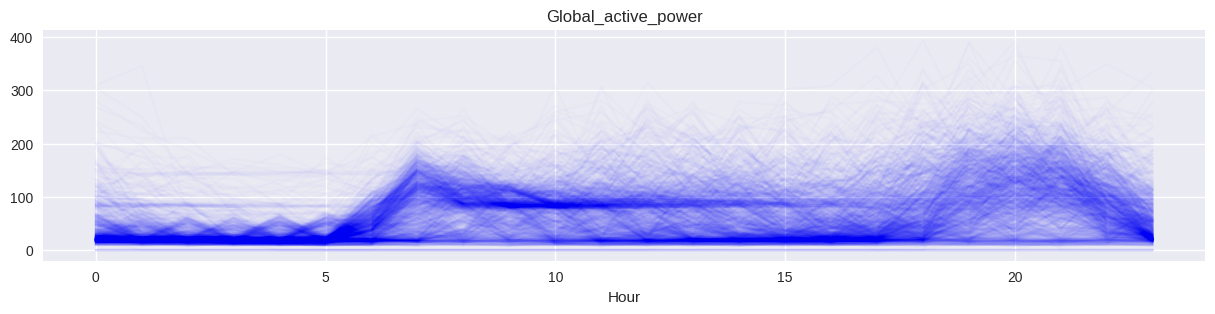

<Figure size 800x550 with 0 Axes>

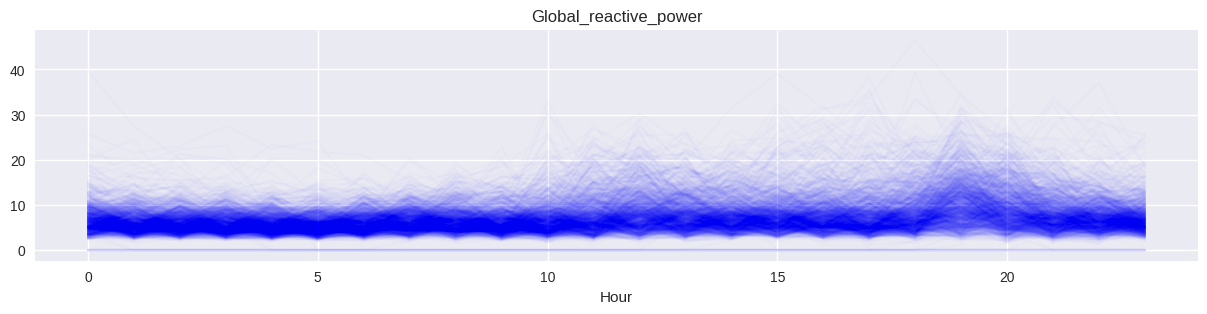

<Figure size 800x550 with 0 Axes>

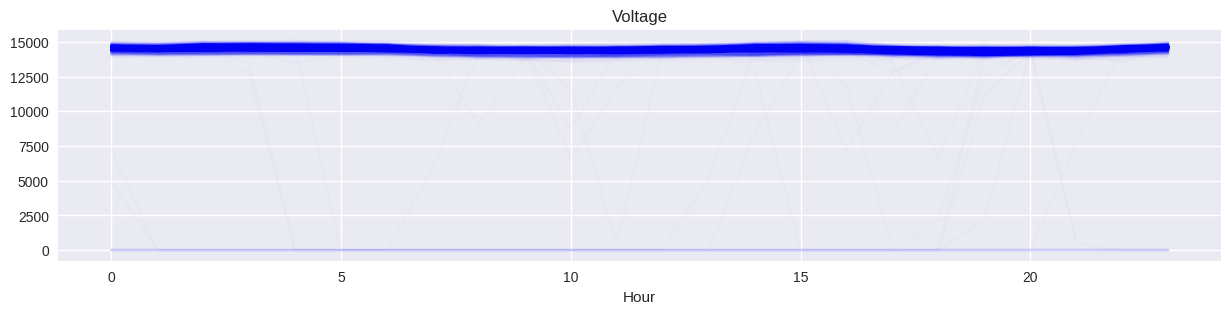

<Figure size 800x550 with 0 Axes>

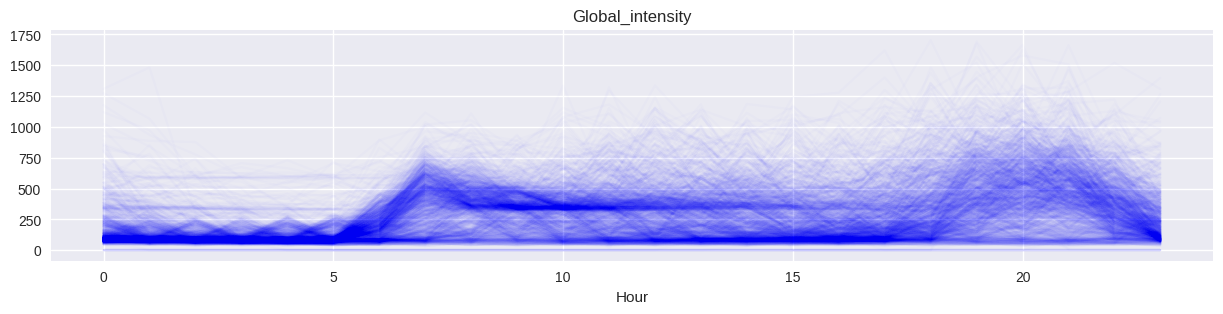

<Figure size 800x550 with 0 Axes>

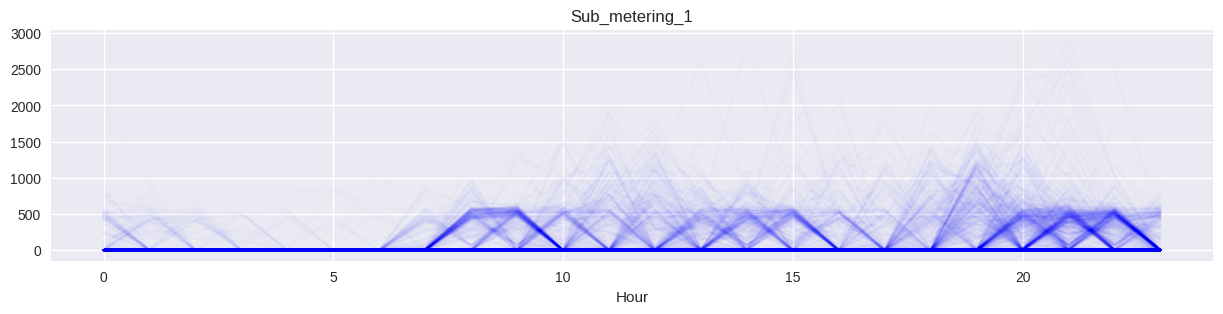

<Figure size 800x550 with 0 Axes>

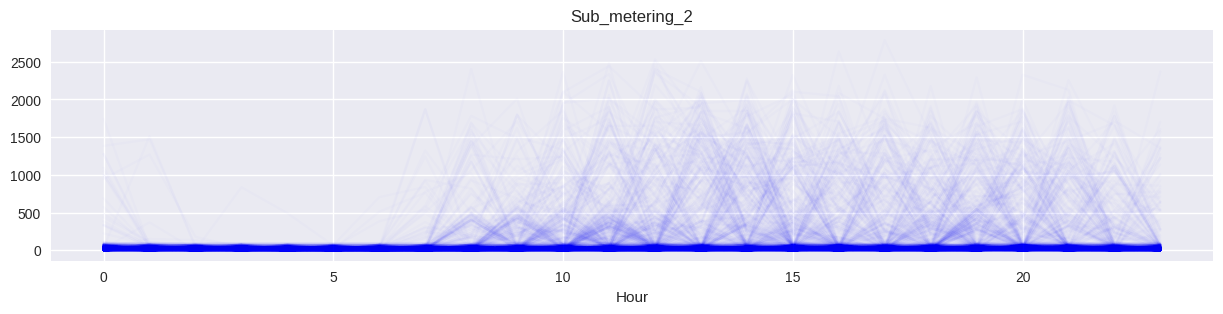

<Figure size 800x550 with 0 Axes>

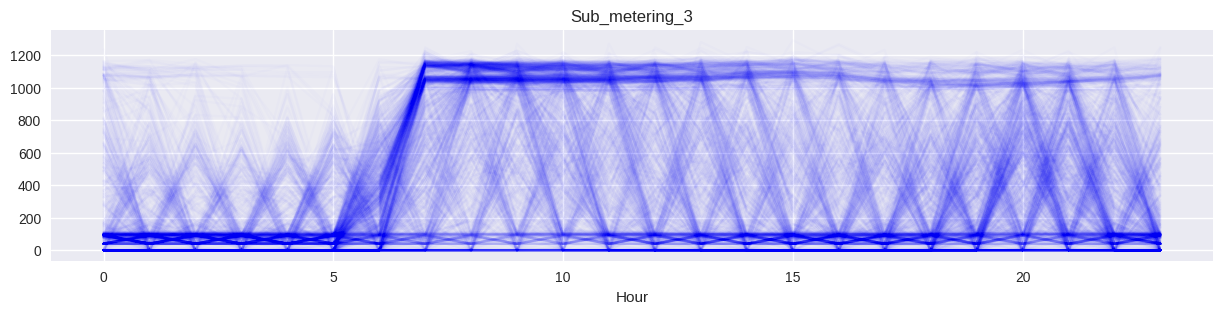

<Figure size 800x550 with 0 Axes>

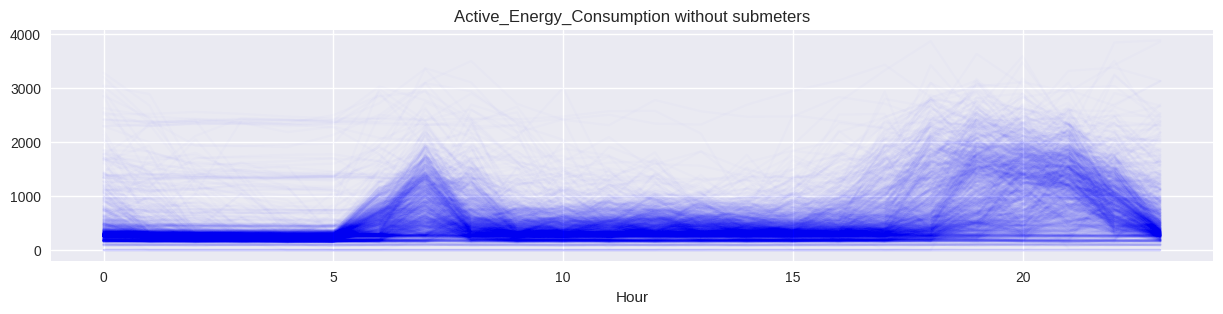

In [30]:
for col in data.columns:
    data_hourly= data.resample('H').sum()
    data_hourly['Hour'] = data_hourly.index.hour
    data_hourly.index = data_hourly.index.date
    data_pivot = data_hourly.pivot(columns='Hour', values=col)
    plt.style.use('seaborn-v0_8')
    plt.figure()
    data_pivot.T.plot(legend=False, alpha=0.01, figsize=(15, 3), color = 'blue')
    # plot mean red line
    plt.title(col)
    plt.show()


In [32]:
# Fourieranalysis
import scipy
import scipy.fftpack

consumption_fft = scipy.fftpack.fft(data['Global_active_power'])
comsumption_psd = np.abs(consumption_fft) ** 2
# steps are i think in minutes steps, but columns are skipped
fftfreq = scipy.fftpack.fftfreq(len(comsumption_psd), 1. / 60*24)
i = fftfreq > 0

plt.figure(figsize=(20, 10))
plt.plot(fftfreq[i], 10 * np.log10(comsumption_psd[i]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (dB)')


KeyError: 'ALIGNED'